# Tuning SVM hyperparameters on spambase dataset

There are two hyperparameters

1. C - the regularization parameter
2. gamma - the kernel bandwidth for the Gaussian kernel

Both the hyperparameters are optimized on the log-scale. The loss function here is the square root of the misclassification rate.

In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting display resolution of plots
mpl.rcParams['figure.dpi']= 150

In [3]:
# loading dataset
dat = pd.read_csv('data/spambase.data',header=None)
X = dat.values[:,:-1]
y = dat.values[:,-1]

In [4]:
# define classifier object and the hyperparameter bounds
clf = Pipeline([('scale',StandardScaler()),
                 ('svc',SVC())])
param_bounds = {'svc__C':[np.exp(-10),np.exp(10)],
                'svc__gamma':[np.exp(-10),np.exp(10)]}

In [5]:
# optimizing square root of misclass rate
def sqrt_mcr(y_true,y_pred):
    return np.sqrt(1-accuracy_score(y_true,y_pred))

# define optimizer object
opt = FCVOpt(clf,param_bounds,sqrt_mcr,kernel="matern",
             logscale=np.array([0,1]),max_iter=40,
             integer = [],
             seed=1234,verbose=2,
             n_folds=5,n_init=3)

# tune hyperparameters
opt.run(X,y)

/home/syl1370/.local/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/syl1370/.local/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


  iter    f_best   acq_best    sigma_f
     0 5.160e-01 3.961e-01 8.604e-02
     1 5.231e-01 4.117e-01 7.947e-02
     2 5.145e-01 4.242e-01 7.789e-02
     3 4.767e-01 3.761e-01 8.785e-02
     4 3.932e-01 2.398e-01 1.037e-01
     5 3.848e-01 2.317e-01 1.100e-01
     6 3.844e-01 2.448e-01 1.119e-01
     7 3.120e-01 1.630e-01 1.195e-01
     8 2.656e-01 1.507e-01 1.316e-01
     9 2.577e-01 1.664e-01 1.357e-01
  iter    f_best   acq_best    sigma_f
    10 2.524e-01 1.675e-01 1.352e-01
    11 2.526e-01 1.654e-01 1.524e-01
    12 2.478e-01 1.803e-01 1.489e-01
    13 2.451e-01 2.058e-01 1.365e-01
    14 2.476e-01 2.157e-01 1.424e-01
    15 2.482e-01 2.133e-01 1.306e-01
    16 2.471e-01 2.207e-01 1.361e-01
    17 2.496e-01 2.250e-01 1.319e-01
    18 2.478e-01 2.264e-01 1.439e-01
    19 2.479e-01 2.275e-01 1.582e-01
  iter    f_best   acq_best    sigma_f
    20 2.472e-01 2.361e-01 1.402e-01
    21 2.474e-01 2.392e-01 1.432e-01
    22 2.454e-01 2.369e-01 1.463e-01
    23 2.456e-01 2.381e-01 1.355

{'x_best': array([1.39508645e+02, 1.10786769e-03]),
 'f_best': 0.245501680990911,
 'acq_cand': 0.23960826738249802,
 'x_cand': array([1.39508645e+02, 1.10786769e-03])}

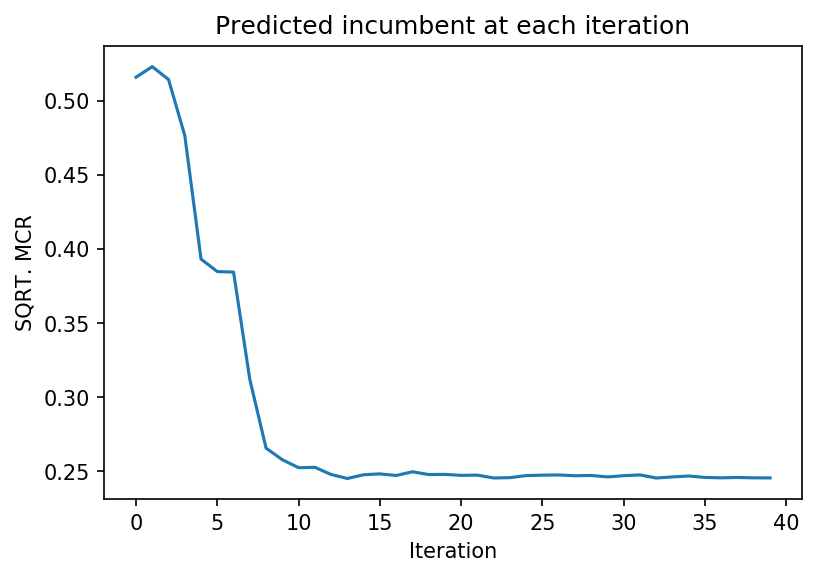

In [8]:
plt.figure()
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('SQRT. MCR')
plt.title('Predicted incumbent at each iteration')
plt.show()

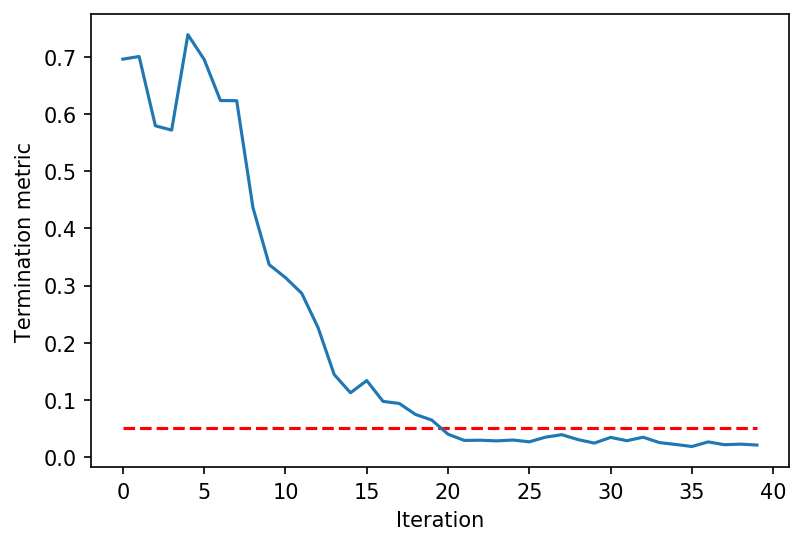

In [7]:
# plotting termination metric
plt.figure()
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.show()